In [4]:
import statistics as stat
import numpy as np
import scipy.stats as sts
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url='http://yustiks.ru/dataset/FilmTV_dataset.csv'
df=pd.read_csv(url)

In [4]:
df

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,28
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",7.0,3
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,10
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin",7.1,14
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,12
...,...,...,...,...,...,...,...,...,...,...
46902,162511,Clowntergeist,2017,Horror,80,United States,Aaron Mirtes,"Aaron Mirtes, Brittany Belland, Monica Baker, ...",6.0,1
46903,162533,Vampirella,1996,Action,82,United States,Jim Wynorski,"Talisa Soto, Roger Daltrey, Richard Joseph Pau...",5.0,1
46904,162711,Circus of the Dead,2017,Action,102,United States,Billy 'Bloody Bill' Pon,"Bill Oberst Jr., Parrish Randall, Chanel Ryan,...",8.0,1
46905,162713,Fear of Clowns,2004,Horror,106,United States,Kevin Kangas,"Rick Ganz, Jacqueline Reres, Mark Lassise, Car...",2.0,1





                                         Математическое ожидание и среднее значение




In [5]:
stat.mean(df['duration'])

99.23111689086916

In [6]:
stat.median(df['duration'])

95

In [7]:
stat.mode(df['duration'])

90

                                Посчитаем количество нулевых значений

In [8]:
df['duration'].isnull().sum()

0

In [9]:
df['actors'].isnull().sum()

129

                                 Стандартное отклонение

In [10]:
stat.pstdev(df['duration'])

34.95860443683266

                                        Дисперсия

In [11]:
stat.pvariance(df['duration'])

1222.1040241709359

                                        Корреляция

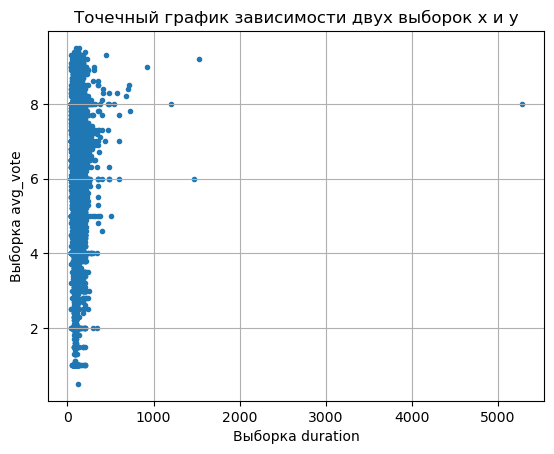

In [12]:
duration= df['duration']
avg_vote= df['avg_vote']
plt.xlabel('Выборка duration')
plt.ylabel('Выборка avg_vote')
plt.title('Точечный график зависимости двух выборок х и у')
plt.grid(True)
plt.scatter(duration, avg_vote, marker='.' )

                                      Нормальное распределение Гаусса

График распределения avg_vote 

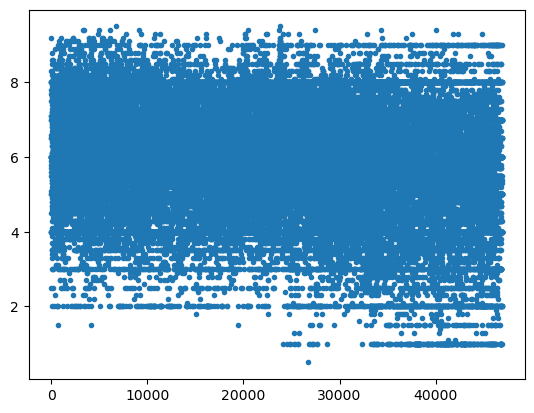

In [13]:
len_column= len(df['avg_vote'])
x=np.linspace(0, len_column, len_column)
plt.scatter(x, df['avg_vote'], marker='.')

Частотный график распределения avg_vote 

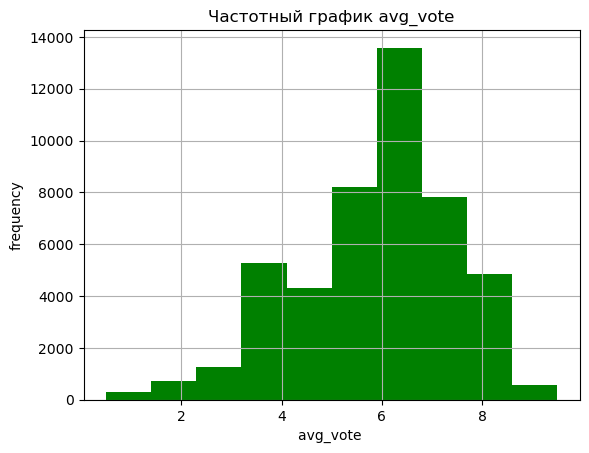

In [14]:
plt.hist(df['avg_vote'], 10, facecolor='g')
plt.xlabel('avg_vote ')
plt.ylabel('frequency')
plt.title('Частотный график avg_vote')
plt.grid(True)
plt.show()


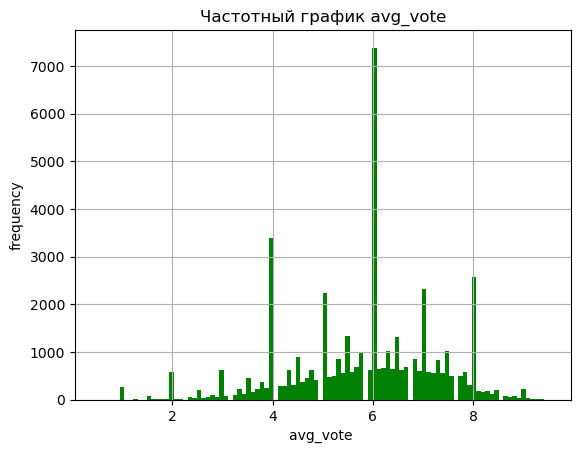

In [15]:
plt.hist(df['avg_vote'], 100, facecolor='g')
plt.xlabel('avg_vote ')
plt.ylabel('frequency')
plt.title('Частотный график avg_vote')
plt.grid(True)
plt.show()


                                    Нормализация данных

In [16]:
drn=df['duration']
drn1= drn-stat.mean(drn)
print(stat.mean(drn1))

6.817162743332029e-15


                                    масштабирование выборки

In [19]:
from sklearn import preprocessing
min_max_scaler= preprocessing.MinMaxScaler(feature_range=(-1,1))
drn2= min_max_scaler.fit_transform(np.array(drn1).reshape(-1,1))
print(min(drn2))
print(max(drn2))

[-1.]
[1.]


                                    Корелляция Пирсона

In [20]:
from scipy.stats import pearsonr

In [23]:
corr, p_value= pearsonr(duration, avg_vote)
print(corr)

0.08569623835246754


                                               Матрица корелляций

In [14]:
import seaborn as sns

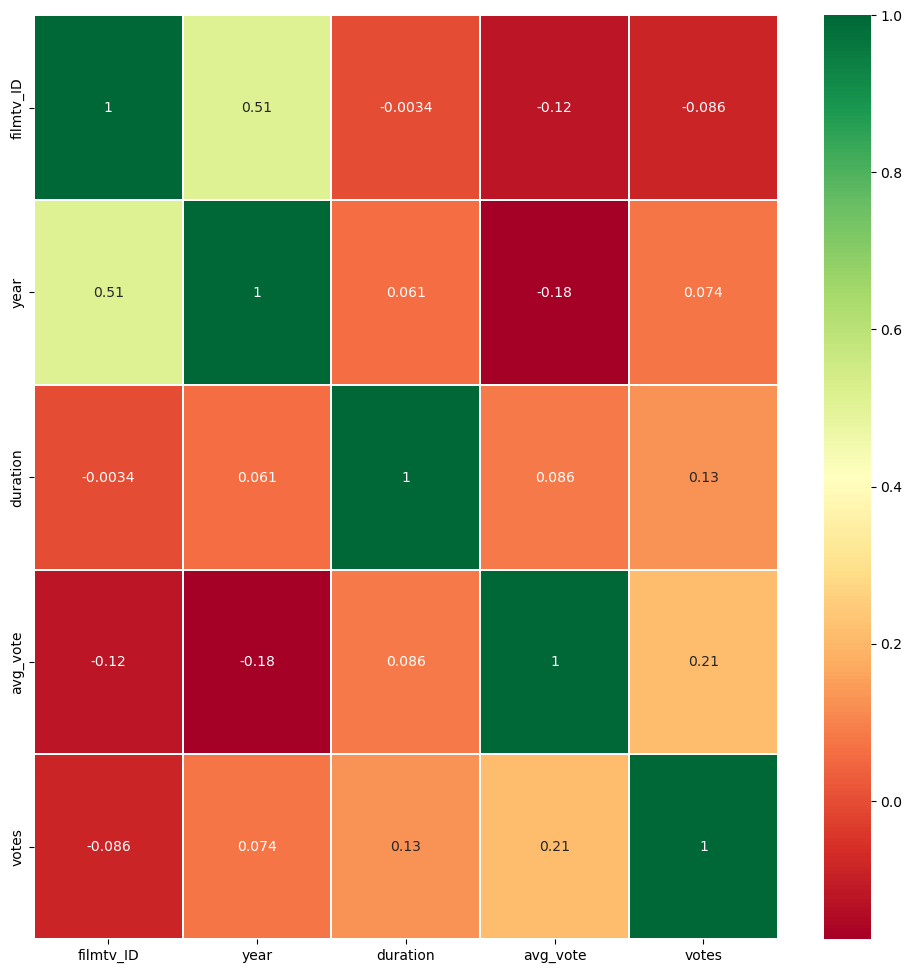

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths= 0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [3]:
url='http://yustiks.ru/dataset/world-happiness-report-2019.csv'
df=pd.read_csv(url)

In [9]:
df

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,63,54.0,102.0,144.0,21.0,2.0,90.0,132.0,103.0
152,Tanzania,153,122,78.0,50.0,131.0,78.0,34.0,49.0,125.0,118.0
153,Afghanistan,154,25,152.0,133.0,151.0,155.0,136.0,137.0,134.0,139.0
154,Central African Republic,155,117,132.0,153.0,155.0,133.0,122.0,113.0,152.0,150.0


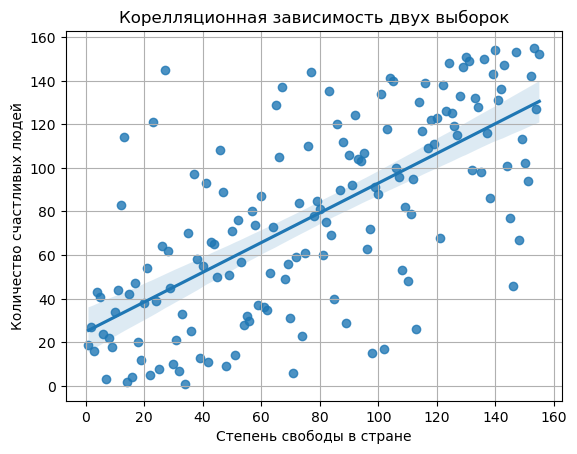

In [10]:
freedom= df['Freedom']
positive= df['Positive affect']
sns.regplot(x=freedom, y=positive, data=df, fit_reg=True)
plt.xlabel('Степень свободы в стране')
plt.ylabel('Количество счастливых людей')
plt.title('Корелляционная зависимость двух выборок')
plt.grid(True)
plt.show()

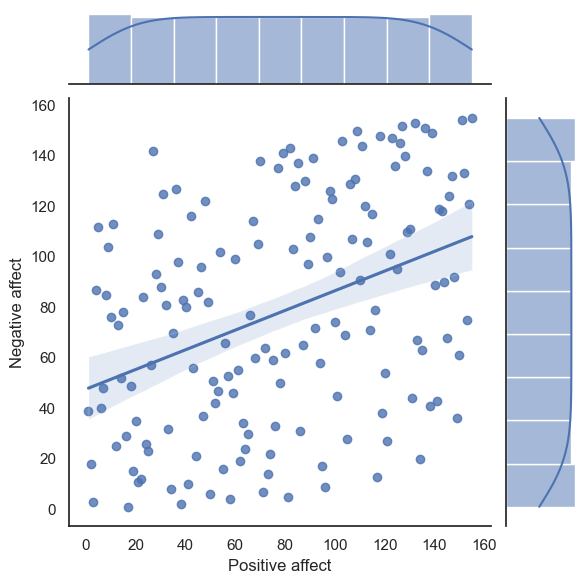

In [12]:
corruption= df['Corruption']
negative= df['Negative affect']
sns.set(style='white', color_codes=True)
g= sns.jointplot(x=positive, y= negative, data=df, kind='reg')
plt.show()

In [6]:
import io
import requests
url='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'species' ])
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


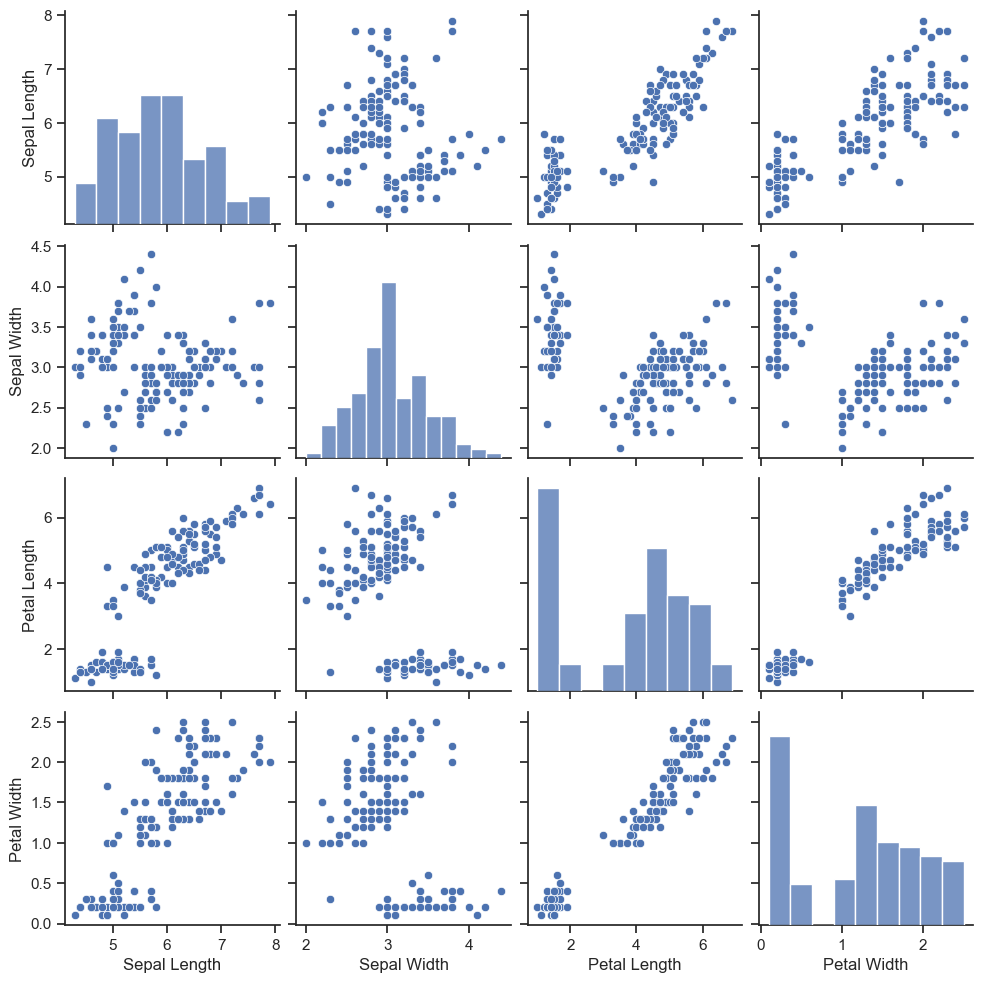

In [15]:
sns.set(style='ticks', color_codes=True)
iris = sns.load_dataset('iris')
g=sns.pairplot(df)

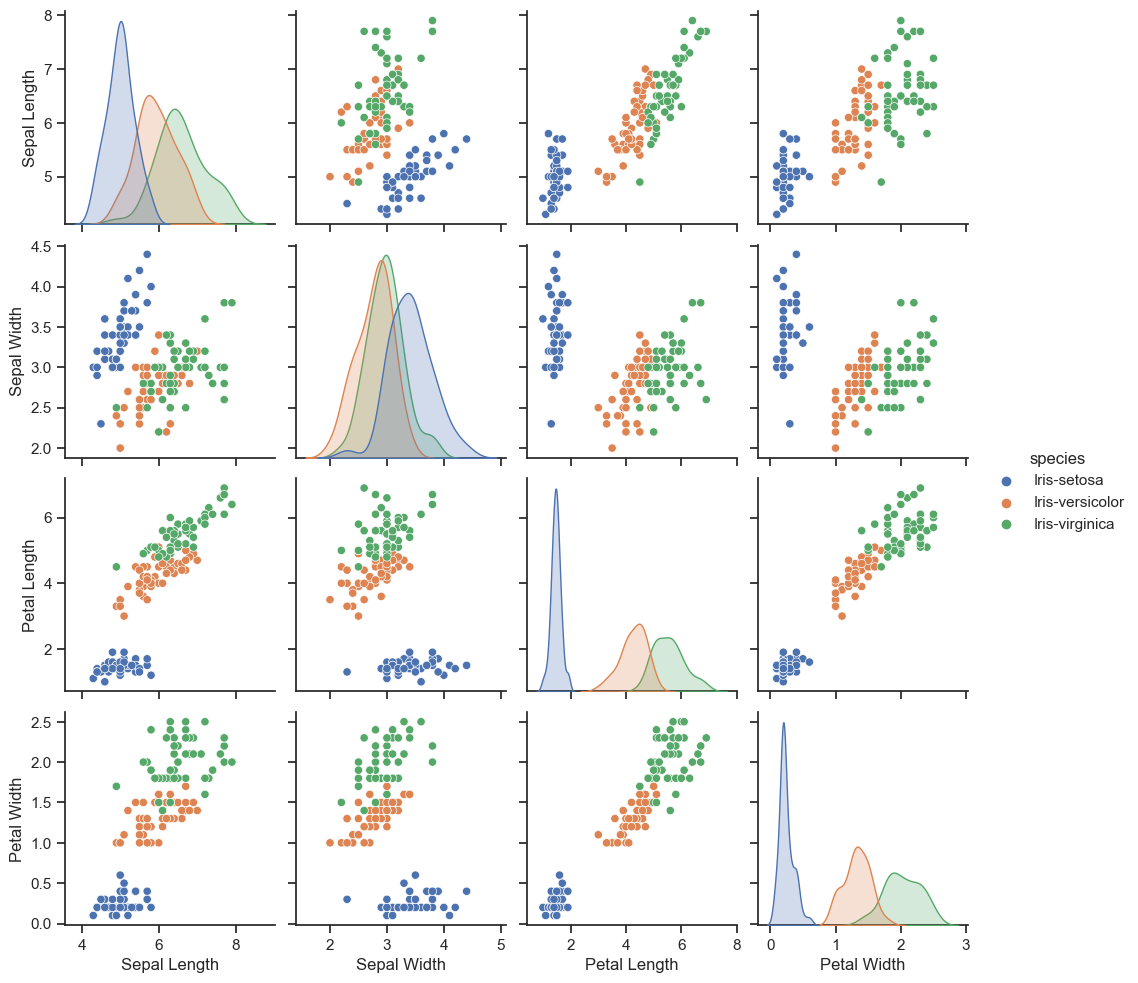

In [21]:
fig= sns.pairplot(data=df, hue='species')
plt.show()

                                             Матрица ковариаций

In [7]:
x=df.iloc[:,:4]
x

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
np.cov(x)

array([[4.75      , 4.42166667, 4.35333333, ..., 2.915     , 2.475     ,
        2.6       ],
       [4.42166667, 4.14916667, 4.055     , ..., 2.95583333, 2.50416667,
        2.62833333],
       [4.35333333, 4.055     , 3.99      , ..., 2.68833333, 2.28166667,
        2.39666667],
       ...,
       [2.915     , 2.95583333, 2.68833333, ..., 4.18916667, 3.65083333,
        3.835     ],
       [2.475     , 2.50416667, 2.28166667, ..., 3.65083333, 3.20916667,
        3.375     ],
       [2.6       , 2.62833333, 2.39666667, ..., 3.835     , 3.375     ,
        3.55      ]])

In [10]:
np.cov(x.T)

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

Приведем к нормальному виду и посчитаем матрицу ковариаций

In [11]:
standart= (x-x.mean())/x.std()
np.cov(standart.T)

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [12]:
x.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.109369,0.871754,0.817954
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544
Petal Length,0.871754,-0.420516,1.000000,0.962757
Petal Width,0.817954,-0.356544,0.962757,1.000000
